In [ ]:
from fastai.vision import *

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
!pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


In [ ]:
!pwd

/content


In [ ]:
!mkdir -p ~/.kaggle/

In [ ]:
!chmod 600 kaggle.json

In [ ]:
!mv kaggle.json ~/.kaggle/

In [ ]:
print(Config.data_path())

/root/.fastai/data


In [ ]:
path = Config.data_path()/'dogs_vs_cats'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/root/.fastai/data/dogs_vs_cats')

In [ ]:
!kaggle competitions download -c dogs-vs-cats -p {path}

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 75.0MB/s]
 97% 262M/271M [00:03<00:00, 101MB/s] 
100% 271M/271M [00:03<00:00, 82.6MB/s]
 98% 533M/543M [00:04<00:00, 120MB/s] 
100% 543M/543M [00:04<00:00, 126MB/s]


In [ ]:
!mv sampleSubmission.csv {path}
# moved all folders to path

In [ ]:
!unzip -q -n {path}/test1.zip -d {path}
# extracting all the zip files

In [ ]:
!dir {path}

sampleSubmission.csv  test1  test1.zip	train  train.zip


In [ ]:
!dir {path}/train
# so it means each file is labeled based on the name of the file

Streaming output truncated to the last 5000 lines.
cat.10000.jpg  cat.3251.jpg  cat.7752.jpg   dog.12251.jpg  dog.5501.jpg
cat.10001.jpg  cat.3252.jpg  cat.7753.jpg   dog.12252.jpg  dog.5502.jpg
cat.10002.jpg  cat.3253.jpg  cat.7754.jpg   dog.12253.jpg  dog.5503.jpg
cat.10003.jpg  cat.3254.jpg  cat.7755.jpg   dog.12254.jpg  dog.5504.jpg
cat.10004.jpg  cat.3255.jpg  cat.7756.jpg   dog.12255.jpg  dog.5505.jpg
cat.10005.jpg  cat.3256.jpg  cat.7757.jpg   dog.12256.jpg  dog.5506.jpg
cat.10006.jpg  cat.3257.jpg  cat.7758.jpg   dog.12257.jpg  dog.5507.jpg
cat.10007.jpg  cat.3258.jpg  cat.7759.jpg   dog.12258.jpg  dog.5508.jpg
cat.10008.jpg  cat.3259.jpg  cat.775.jpg    dog.12259.jpg  dog.5509.jpg
cat.10009.jpg  cat.325.jpg   cat.7760.jpg   dog.1225.jpg   dog.550.jpg
cat.1000.jpg   cat.3260.jpg  cat.7761.jpg   dog.12260.jpg  dog.5510.jpg
cat.10010.jpg  cat.3261.jpg  cat.7762.jpg   dog.12261.jpg  dog.5511.jpg
cat.10011.jpg  cat.3262.jpg  cat.7763.jpg   dog.12262.jpg  dog.5512.jpg
cat.10012.jpg 

In [ ]:
from fastai.metrics import error_rate

In [ ]:
bs = 64

In [ ]:
np.random.seed(42)

In [ ]:
path_img = path/'train'
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/dogs_vs_cats/train/dog.870.jpg'),
 PosixPath('/root/.fastai/data/dogs_vs_cats/train/cat.7162.jpg'),
 PosixPath('/root/.fastai/data/dogs_vs_cats/train/dog.4098.jpg'),
 PosixPath('/root/.fastai/data/dogs_vs_cats/train/cat.700.jpg'),
 PosixPath('/root/.fastai/data/dogs_vs_cats/train/dog.2970.jpg')]

In [ ]:
#pattern = r'/train/[A-Za-z]+'

# pattern matching doesn't seem to work
# see here for regex :https://www.kaggle.com/gianfa/fastaiv1-image-classifier

In [ ]:
#data = ImageDataBunch.from_name_re(path_img, fnames, pattern, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

In [ ]:
# from https://www.kaggle.com/uysimty/keras-cnn-dog-or-cat-classification
categories = []
filenames = os.listdir(path_img)

for filename in filenames:
  if ('dog' in filename):
    categories.append('dog')
  else :
    categories.append('cat')

In [ ]:
# df = pd.DataFrame({
#     'filename': filenames,
#     'category': categories
# })

In [ ]:
# df.head()
# now that we have a dataframe of labels 
# now we need to call ImageDataBunch

,filename,category
0,dog.870.jpg,0
1,cat.7162.jpg,1
2,dog.4098.jpg,0
3,cat.700.jpg,1
4,dog.2970.jpg,0


In [ ]:
categories[:5]

['dog', 'cat', 'dog', 'cat', 'dog']

In [ ]:
# https://www.kaggle.com/good74152/dogs-vs-cats-use-fastai-v3
data = ImageDataBunch.from_lists(path_img, fnames, ds_tfms=get_transforms(), size=224, bs=64, labels=categories )

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

In [ ]:
data.classes

['cat', 'dog']

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

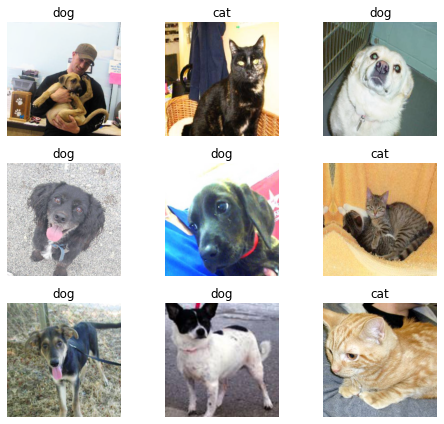

In [ ]:
data.show_batch(rows=3, figsize=(7,6))

In [ ]:
# we will use a convolutional neural network with a cnn backbone

learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.075090,0.031634,0.011800,1:57:26


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
learn.save('stage1-cats_vs_dogs')

In [ ]:
# test = ImageList.from_folder(path/'test1')
# len(test)

In [ ]:
test_images = get_image_files(path/'test1')
test_images[:5]

[PosixPath('/root/.fastai/data/dogs_vs_cats/test1/3289.jpg'),
 PosixPath('/root/.fastai/data/dogs_vs_cats/test1/4592.jpg'),
 PosixPath('/root/.fastai/data/dogs_vs_cats/test1/1469.jpg'),
 PosixPath('/root/.fastai/data/dogs_vs_cats/test1/319.jpg'),
 PosixPath('/root/.fastai/data/dogs_vs_cats/test1/2232.jpg')]

In [ ]:
fnames[:5]
submission = pd.DataFrame(os.listdir(path/"test1"),columns = ['id'])
submission['label'] = 0

In [ ]:
count = 0
for imgpath in test_images:
    img = open_image(imgpath)
    pred = learn.predict(img)
    if str(pred[0]) != 'dog':
        submission['label'][count]=0
        count = count+1
    else:
        submission['label'][count]=1
        count = count+1

In [ ]:
submission[['id','label']].to_csv('sampleSubmission.csv',index=False)